<a href="https://colab.research.google.com/github/Manoj010104/FMML_Projects_and_Labs/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is

*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

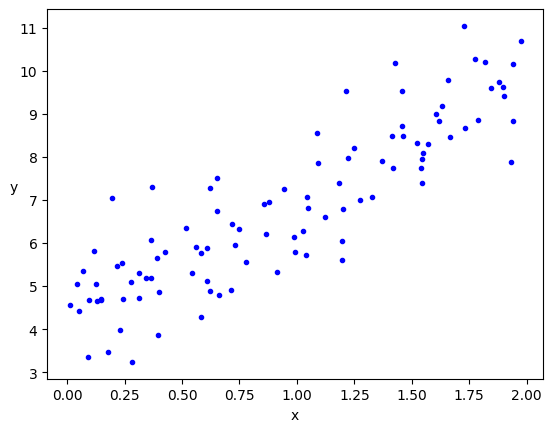

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

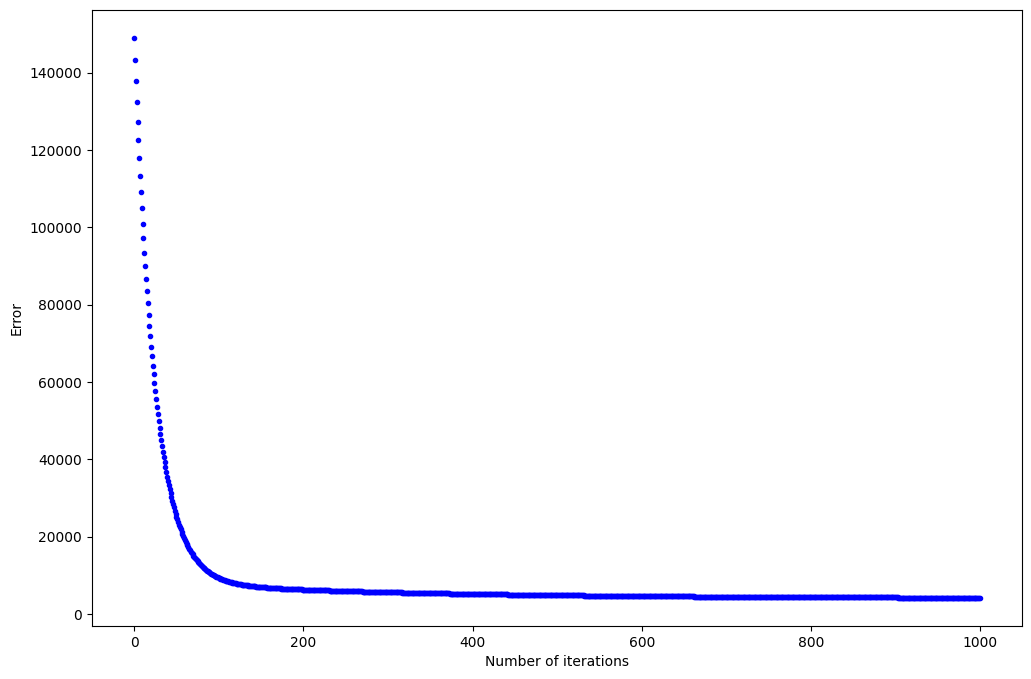

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

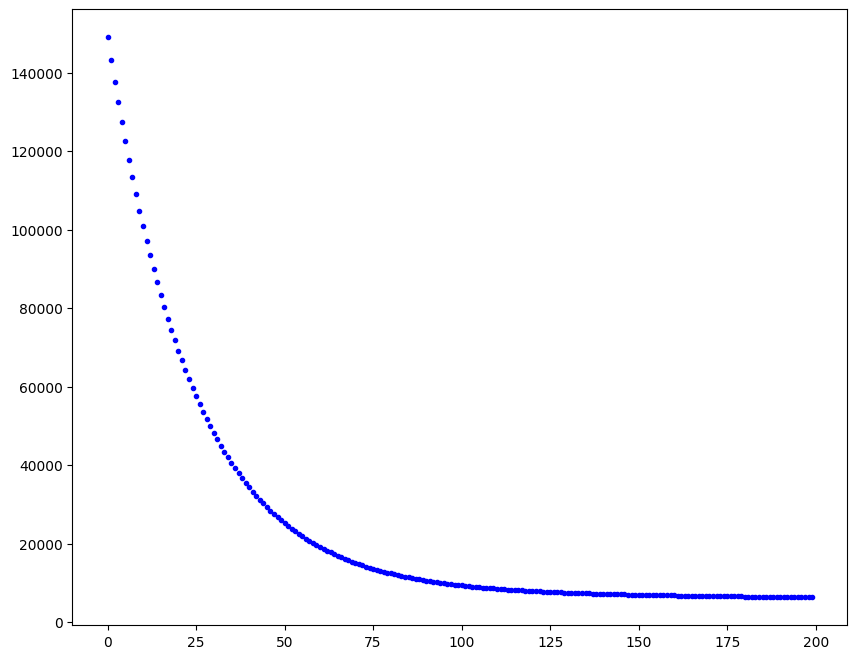

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


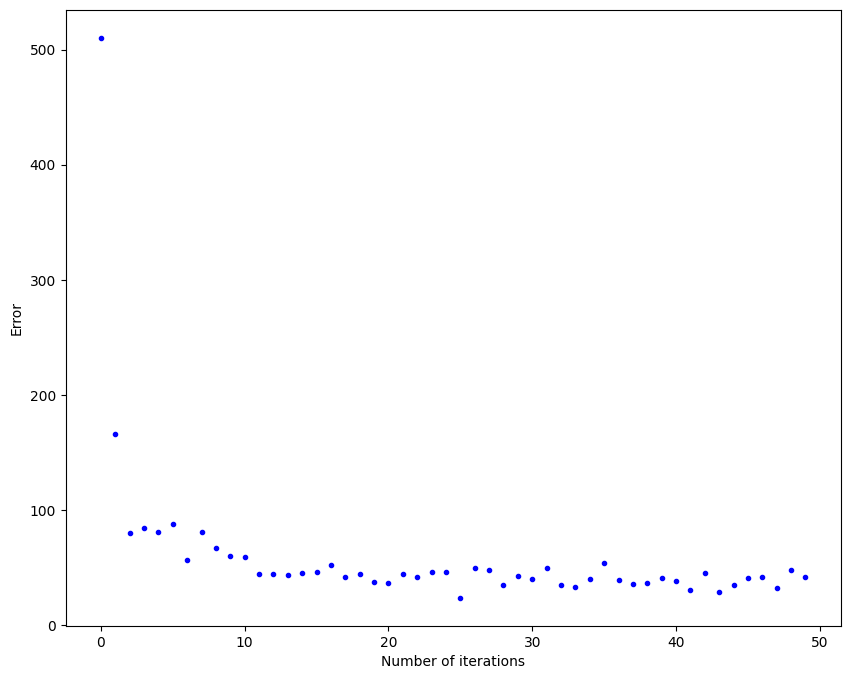

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


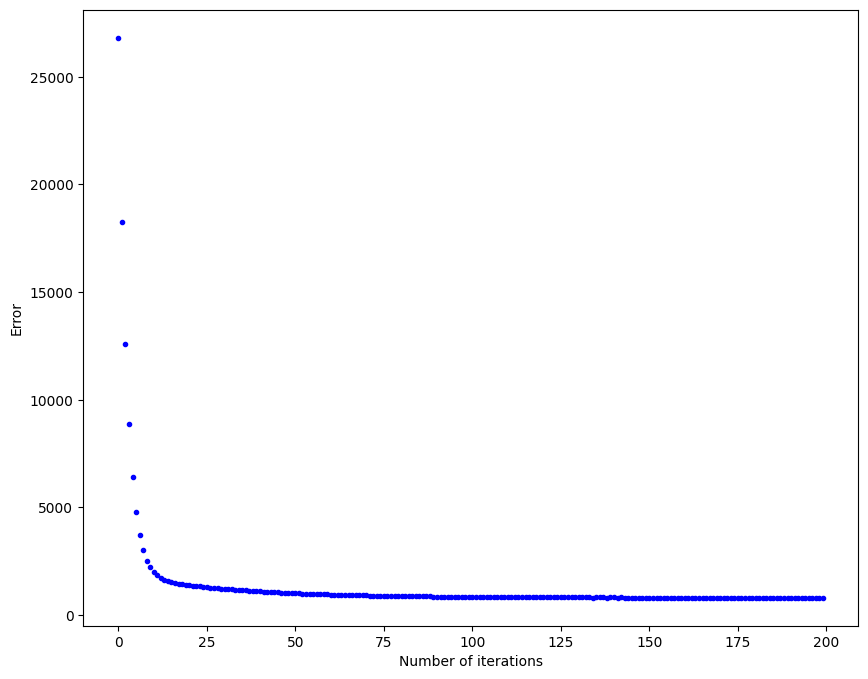

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.


Batch Size = 50 - Final Predicted Weights:
y_pred[0]: 4.248
y_pred[1]: 2.741
Final error: 2010.278


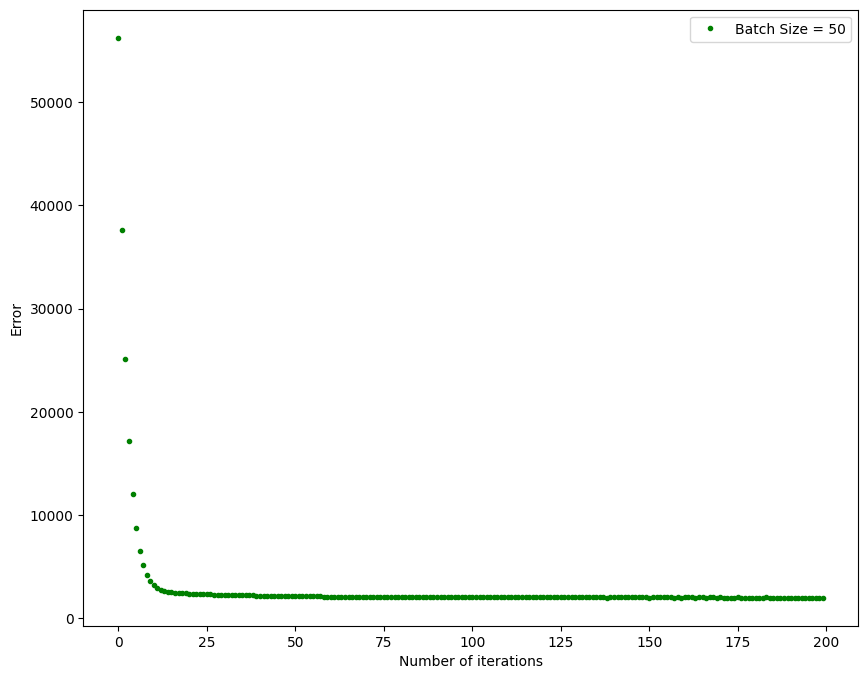

In [16]:
#1. Change batch size in mini-batch gradient descent.

#Experiment 3:Batch Size = 5
lr = 0.1
n_iter = 200
y_pred_50 = np.random.randn(2, 1)
y_pred_50, cost_history_50 = minibatch_gradient_descent(X, y, y_pred_50, lr, n_iter, batch_size=50)

print('\nBatch Size = 50 - Final Predicted Weights:')
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_50[0][0], y_pred_50[1][0]))
print('Final error: {:0.3f}'.format(cost_history_50[-1]))

# Plot for Batch Size = 50
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred_50 = np.random.randn(2, 1)
ax.plot(range(n_iter), cost_history_50, 'g.', label="Batch Size = 50")
ax.legend()

plt.show()



In [17]:
from sklearn import datasets
import pandas as pd

diabetes = datasets.load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

print(diabetes_df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


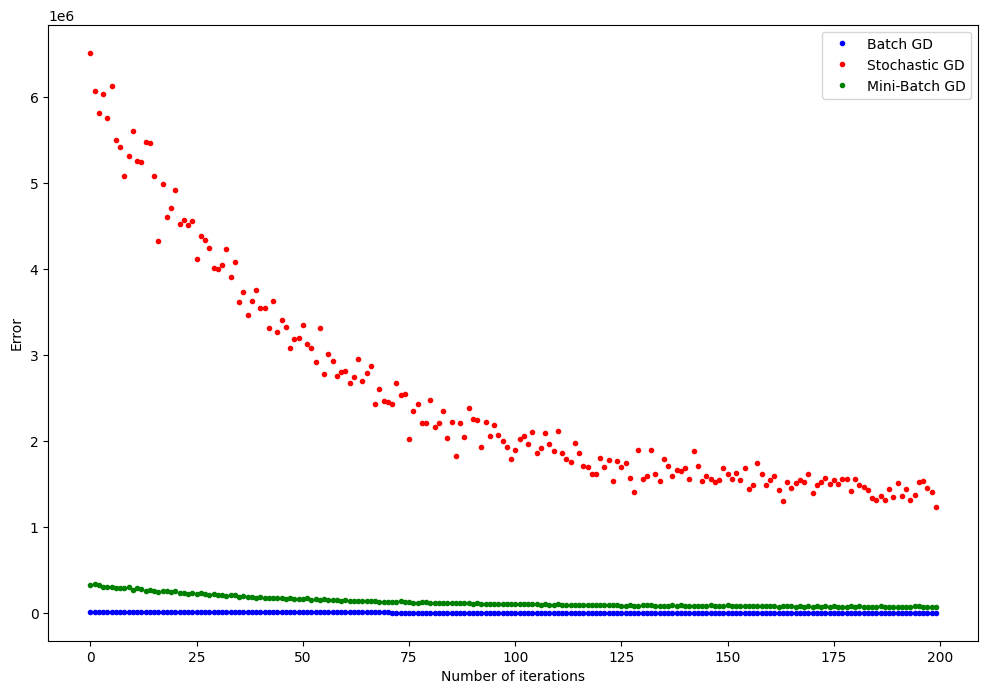

In [18]:
#2. Test all the three out on real datasets.
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

y_diabetes = np.expand_dims(y_diabetes, axis=1)

def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

#Batch Gradient Descent
def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, len(y_pred)))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it, :] = y_pred.flatten()
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history


# Stochastic
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Mini-Batch
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

#Batch
lr_bgd = 0.01
n_iter_bgd = 200
y_pred_bgd = np.random.randn(11, 1)
X_b_bgd = np.c_[np.ones((len(X_diabetes), 1)), X_diabetes]
y_pred_bgd, cost_history_bgd, y_pred_history_bgd = batch_gradient_descent(
    X_b_bgd, y_diabetes, y_pred_bgd, lr_bgd, n_iter_bgd
)

#Stochastic
lr_sgd = 0.01
n_iter_sgd = 200
y_pred_sgd = np.random.randn(11, 1)
X_b_sgd = np.c_[np.ones((len(X_diabetes), 1)), X_diabetes]
y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(
    X_b_sgd, y_diabetes, y_pred_sgd, lr_sgd, n_iter_sgd
)

#Mini-Batch
lr_mbgd = 0.01
n_iter_mbgd = 200
batch_size_mbgd = 20
y_pred_mbgd = np.random.randn(11, 1)
y_pred_mbgd, cost_history_mbgd = minibatch_gradient_descent(
    X_diabetes, y_diabetes, y_pred_mbgd, lr_mbgd, n_iter_mbgd, batch_size_mbgd
)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter_bgd), cost_history_bgd, 'b.', label="Batch GD")
ax.plot(range(n_iter_sgd), cost_history_sgd, 'r.', label="Stochastic GD")
ax.plot(range(n_iter_mbgd), cost_history_mbgd, 'g.', label="Mini-Batch GD")

ax.legend()
plt.show()


Gradient descent y_pred[0]: 152.133
y_pred[1]: 11.512
Gradient descent Final error: 2636.575
Stochastic Gradient descent y_pred[0]: 152.106
y_pred[1]: 12.888
Stochastic Gradient descent Final error: 1078303.678
Mini-batch Gradient descent y_pred[0]: 152.127
y_pred[1]: 12.929
Mini-batch Gradient descent Final error: 66482.611


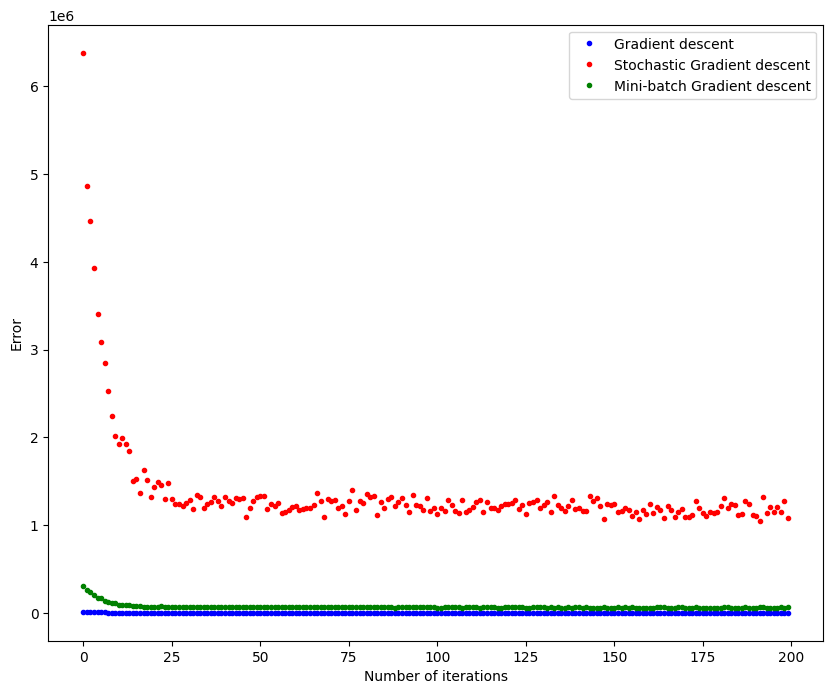

Gradient descent y_pred[0]: 131.729
y_pred[1]: 2.191
Gradient descent Final error: 3138.068
Stochastic Gradient descent y_pred[0]: 131.298
y_pred[1]: 1.225
Stochastic Gradient descent Final error: 1470173.438
Mini-batch Gradient descent y_pred[0]: 131.599
y_pred[1]: 1.381
Mini-batch Gradient descent Final error: 72556.222


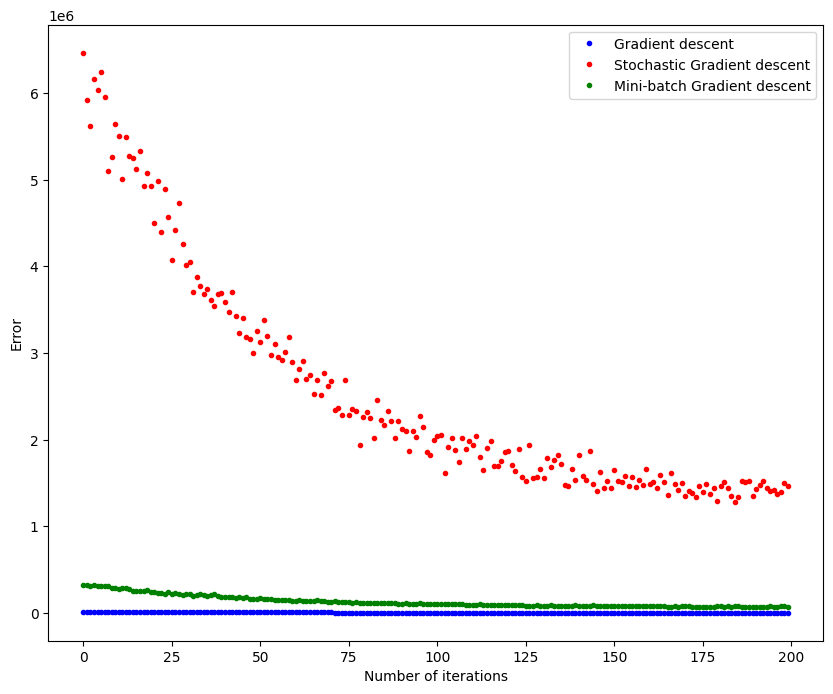

Gradient descent y_pred[0]: 27.998
y_pred[1]: -1.219
Gradient descent Final error: 10663.612
Stochastic Gradient descent y_pred[0]: 27.662
y_pred[1]: -0.383
Stochastic Gradient descent Final error: 4938750.772
Mini-batch Gradient descent y_pred[0]: 27.552
y_pred[1]: -1.042
Mini-batch Gradient descent Final error: 246028.494


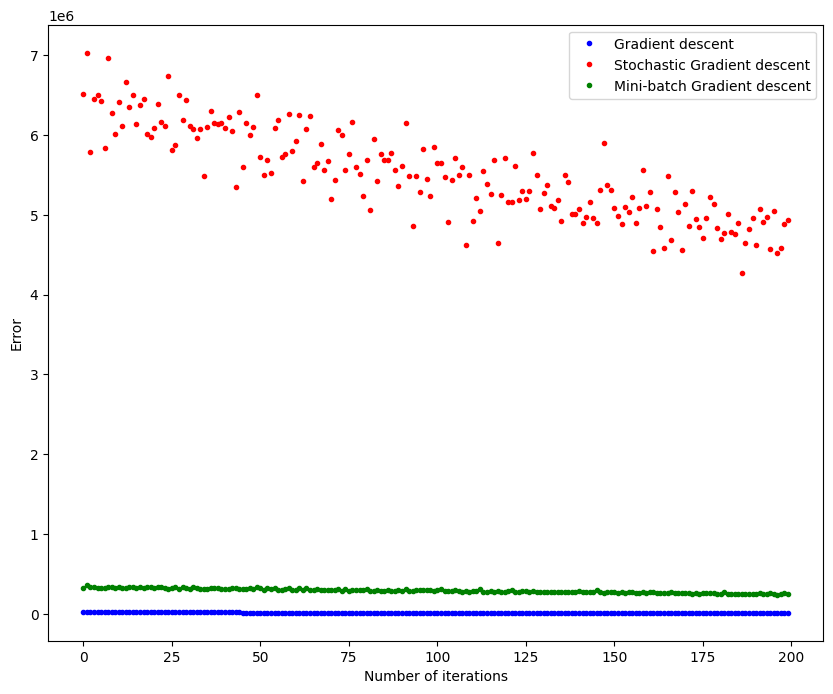

In [19]:

#3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

def comp_gd_sgd_mgd(X, y, lr, n_iter):
    y_pred_gd = np.random.randn(X.shape[1] + 1, 1)
    X_b_gd = np.c_[np.ones((len(X), 1)), X]
    y_pred_gd, cost_history_gd, _ = batch_gradient_descent(X_b_gd, y, y_pred_gd, lr, n_iter)

    y_pred_sgd = np.random.randn(X.shape[1] + 1, 1)
    X_b_sgd = np.c_[np.ones((len(X), 1)), X]
    y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(X_b_sgd, y, y_pred_sgd, lr, n_iter)

    y_pred_mgd = np.random.randn(X.shape[1] + 1, 1)
    y_pred_mgd, cost_history_mgd = minibatch_gradient_descent(X, y, y_pred_mgd, lr, n_iter, batch_size=20)

    print('Gradient descent y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_gd[0][0], y_pred_gd[1][0]))
    print('Gradient descent Final error: {:0.3f}'.format(cost_history_gd[-1]))

    print('Stochastic Gradient descent y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_sgd[0][0], y_pred_sgd[1][0]))
    print('Stochastic Gradient descent Final error: {:0.3f}'.format(cost_history_sgd[-1]))

    print('Mini-batch Gradient descent y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_mgd[0][0], y_pred_mgd[1][0]))
    print('Mini-batch Gradient descent Final error: {:0.3f}'.format(cost_history_mgd[-1]))

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_ylabel('Error')
    ax.set_xlabel('Number of iterations')

    ax.plot(range(n_iter), cost_history_gd, 'b.', label="Gradient descent")
    ax.plot(range(n_iter), cost_history_sgd, 'r.', label="Stochastic Gradient descent")
    ax.plot(range(n_iter), cost_history_mgd, 'g.', label="Mini-batch Gradient descent")
    ax.legend()

lr = 0.1
n_iter = 200
comp_gd_sgd_mgd(X_diabetes, y_diabetes, lr, n_iter)
plt.show()


lr = 0.01
n_iter = 200
comp_gd_sgd_mgd(X_diabetes, y_diabetes, lr, n_iter)
plt.show()

lr = 0.001
n_iter = 200
comp_gd_sgd_mgd(X_diabetes, y_diabetes, lr, n_iter)
plt.show()

